# 데이터 전처리

 ### 목차
* 중복데이터 처리
* 결측데이터 처리
* 이상데이터 처리
* **타이타닉 생존자 데이터셋 전처리**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

### 중복데이터처리(df.duplicated())

In [2]:
dict_1 = {
    'item_id' : [1, 1, 2, 2, 2, 2, 3, 4],
    'company' : ['A', 'A', 'B', 'B', 'B', 'C', 'A', 'C'],
    'item_name' : ['apple', 'apple', 'banana', 'banana', 'banana', 'banana', 'grape', 'watermelon'],
    'price' : [15000, 15000, 4750, 4750, 4750, 4200, 13000, 18000],
    'color' : ['red', 'red', 'yellow', 'yellow', 'yellow', 'yellow', 'purple', 'green']
}

df_1 = pd.DataFrame(dict_1)
print(df_1)

   item_id company   item_name  price   color
0        1       A       apple  15000     red
1        1       A       apple  15000     red
2        2       B      banana   4750  yellow
3        2       B      banana   4750  yellow
4        2       B      banana   4750  yellow
5        2       C      banana   4200  yellow
6        3       A       grape  13000  purple
7        4       C  watermelon  18000   green


In [3]:
# 1. 중복된 행은 True로 표시함
duplicated_bool = df_1.duplicated()
print(duplicated_bool)
print()
# 2. 중복된 행 삭제 후 데이터프레임 출력
df_1.drop_duplicates(inplace = True)
print(df_1)
print()
# 3. 인덱스 번호로 특정 행 추출
print(df_1.loc[6])
print()
# 4. 컬럼명으로 특정 행 추출
print(df_1.iloc[3])
print()

0    False
1     True
2    False
3     True
4     True
5    False
6    False
7    False
dtype: bool

   item_id company   item_name  price   color
0        1       A       apple  15000     red
2        2       B      banana   4750  yellow
5        2       C      banana   4200  yellow
6        3       A       grape  13000  purple
7        4       C  watermelon  18000   green

item_id           3
company           A
item_name     grape
price         13000
color        purple
Name: 6, dtype: object

item_id           3
company           A
item_name     grape
price         13000
color        purple
Name: 6, dtype: object



* 인덱스 초기화

In [4]:
# 인덱스 초기화!!
print(df_1)
print('\n \t ----인덱스 초기화 후---- \n')
df_1.reset_index(inplace = True, drop = True)
print(df_1)

   item_id company   item_name  price   color
0        1       A       apple  15000     red
2        2       B      banana   4750  yellow
5        2       C      banana   4200  yellow
6        3       A       grape  13000  purple
7        4       C  watermelon  18000   green

 	 ----인덱스 초기화 후---- 

   item_id company   item_name  price   color
0        1       A       apple  15000     red
1        2       B      banana   4750  yellow
2        2       C      banana   4200  yellow
3        3       A       grape  13000  purple
4        4       C  watermelon  18000   green


### 결측 데이터 처리

In [5]:
dict_1 = {
    'col1' : [1, 2, 3, np.nan, np.nan],
    'col2' : [10, 20, np.nan, 40, 50],
    'col3' : [np.nan, 200, 300, 400, np.nan]
}
df_2 = pd.DataFrame(dict_1)
print(df_2)
print("\n ====결측치는 True로 표시 ==== \n")
print(pd.isna(df_2))
#print(pd.isnull(df_2))

   col1  col2   col3
0   1.0  10.0    NaN
1   2.0  20.0  200.0
2   3.0   NaN  300.0
3   NaN  40.0  400.0
4   NaN  50.0    NaN

 ====결측치는 True로 표시 ==== 

    col1   col2   col3
0  False  False   True
1  False  False  False
2  False   True  False
3   True  False  False
4   True  False   True


In [6]:
df_3 = df_2.copy()
#결측 값 존재하는 행 제거
df_3.dropna(inplace = True)
print("<결측 값 존재하는 행 제거>")
print(df_3)

df_3 = df_2.copy()
#결측 값을 0으로 채우기
df_3.fillna(0, inplace = True)
print("\n<결측 값을 0으로 채우기>")
print(df_3)

df_3 = df_2.copy()
#결측 값을 열 평균 값으로 채우기
df_3.fillna(df_3.mean(), inplace = True)
print("\n<결측 값을 열 평균 값으로 채우기>")
print(df_3)

<결측 값 존재하는 행 제거>
   col1  col2   col3
1   2.0  20.0  200.0

<결측 값을 0으로 채우기>
   col1  col2   col3
0   1.0  10.0    0.0
1   2.0  20.0  200.0
2   3.0   0.0  300.0
3   0.0  40.0  400.0
4   0.0  50.0    0.0

<결측 값을 열 평균 값으로 채우기>
   col1  col2   col3
0   1.0  10.0  300.0
1   2.0  20.0  200.0
2   3.0  30.0  300.0
3   2.0  40.0  400.0
4   2.0  50.0  300.0


### 이상데이터처리

* 낮은 이상치 : (Q1 - 1.5 *IQR)보다 작은 값
* 높은 이상치 : (Q3 + 1.5 *IQR)보다 높은 값

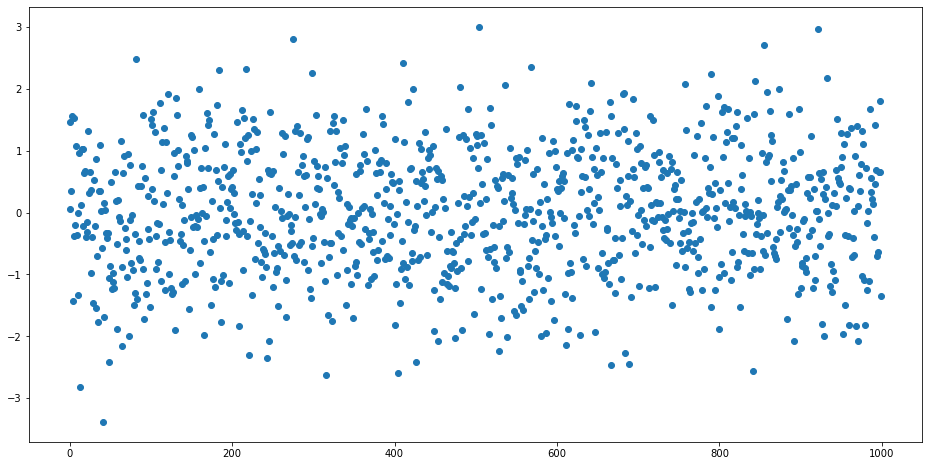

In [7]:
data = np.random.randn(1000)
plt.figure(figsize=(16,8))
plt.plot(data,'o')
plt.show()

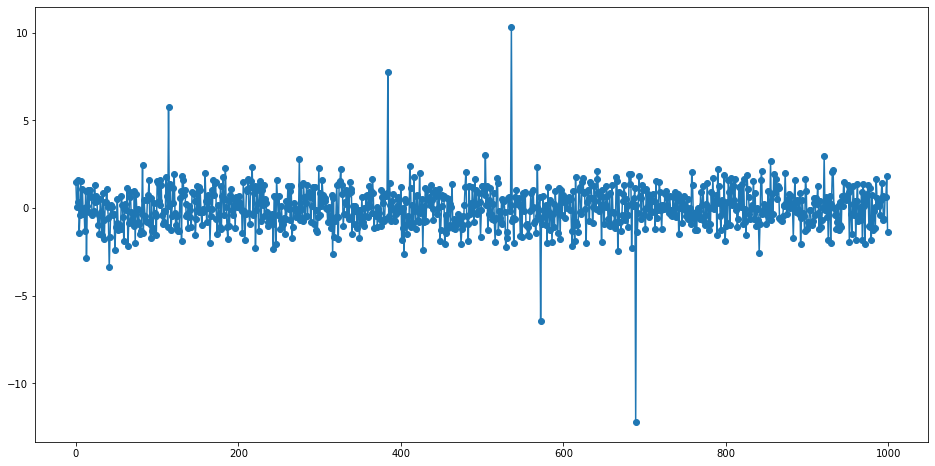

In [8]:
ol_data = data.copy()
ol_num = 10
for i in range(ol_num):
    rand_id = np.random.randint(0,len(data))
    ol_data[rand_id] = ol_data[rand_id]*5
plt.figure(figsize=(16,8))
plt.plot(ol_data, 'o-')
plt.show()

* 사분위수 메소드 quantile() 사용!

Q1: -0.6842151385455126
Q3:  0.7193800200880047
IQR:  1.4035951586335174
5
4


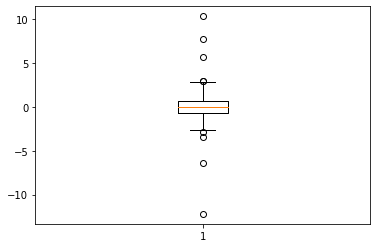

In [30]:
ol_data2 = pd.Series(ol_data)    #넘파이 배열은 사분위수 사용 불가능이므로 시리즈로 변환!!
plt.boxplot(ol_data2)
Q1 = ol_data2.quantile(0.25)
Q3 = ol_data2.quantile(0.75)
#Q3 = ol_data.quantile(0.75)
IQR = Q3 - Q1
print("Q1:", Q1)
print("Q3: ", Q3)
print("IQR: ", IQR)
print(ol_data2[ol_data2 > (Q3 + 1.5 *IQR)].count())
print(ol_data2[ol_data2 < (Q1 - 1.5 *IQR)].count())

## 타이타닉 생존자 데이터셋 전처리

In [31]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
print(titanic)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

1) 원본데이터 copy(백업) 

In [32]:
data = titanic.copy()    #데이터 복사하기
print(id(data), id(titanic)) #=> 서로 다른 메모리 주소에 저장되어 있음을 확인 가능

1546322133488 1546322133680


2) 중복 데이터 처리 

In [33]:
dup = data.duplicated()
print(dup.sum())    #중복 데이터 개수 출력
print()
#중복 데이터 삭제
data.drop_duplicates(inplace = True)
print(data.count())
print()
print(titanic.count())

107

survived       784
pclass         784
sex            784
age            678
sibsp          784
parch          784
fare           784
embarked       782
class          784
who            784
adult_male     784
deck           202
embark_town    782
alive          784
alone          784
dtype: int64

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64


3) 결측 데이터 처리

In [34]:
#일부 열만 가져오기
data2 = data[["survived","sex","fare","age"]]
#각 열의 데이터 개수 확인
print("===각 열의 데이터 개수===")
print(data2.count())
print()
#결측 데이터 개수 확인
print("===결측 데이터 개수===")
print(data2.isna().sum())
#결측 데이터 삭제
data2.dropna(inplace=True)
#각 열 데이터 개수 확인
print("===각 열 데이터 개수 확인===")
print(data2.count())

===각 열의 데이터 개수===
survived    784
sex         784
fare        784
age         678
dtype: int64

===결측 데이터 개수===
survived      0
sex           0
fare          0
age         106
dtype: int64
===각 열 데이터 개수 확인===
survived    678
sex         678
fare        678
age         678
dtype: int64


<ipython-input-34-da63e72ac6f6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.dropna(inplace=True)


4) 이상 데이터 처리
* 사분위 기준 이상 데이터 존재 유무 확인

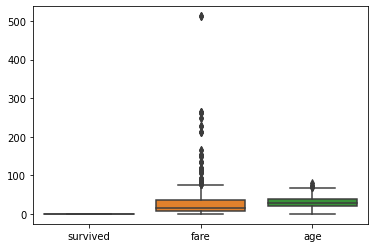

Q1:  8.05
Q3:  35.28855
679    512.3292
737    512.3292
258    512.3292
27     263.0000
438    263.0000
         ...   
102     77.2875
681     76.7292
52      76.7292
645     76.7292
218     76.2917
Name: fare, Length: 88, dtype: float64


In [35]:
sns.boxplot(data=data2)
plt.show()
ser = data2['fare']
Q1 = ser.quantile(0.25)
Q3 = ser.quantile(0.75)
print("Q1: ", Q1)
print("Q3: ", Q3)
IQR = Q3 - Q1
idx = ser[ser > (Q3 + 1.5 * IQR)].index
print(ser[idx].sort_values(ascending = False))

* 범주형 데이터 이상 여부??

In [36]:
print(data2['survived'].value_counts())
print()
print(data2['sex'].value_counts())

0    394
1    284
Name: survived, dtype: int64

male      422
female    256
Name: sex, dtype: int64


In [37]:
def encoding(x):
    if x == 'male':
        return 0
    else:
        return 1

In [40]:
data2['sex_code'] = data2['sex'].apply(encoding)
print(data2['sex'].value_counts())
print()
print(data2['sex_code'].value_counts())

male      422
female    256
Name: sex, dtype: int64

0    422
1    256
Name: sex_code, dtype: int64


<ipython-input-40-e92f2777f785>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['sex_code'] = data2['sex'].apply(encoding)


In [41]:
#인덱스 리셋
data2.reset_index(drop = True, inplace = True)
print(data2)

     survived     sex     fare   age  sex_code
0           0    male   7.2500  22.0         0
1           1  female  71.2833  38.0         1
2           1  female   7.9250  26.0         1
3           1  female  53.1000  35.0         1
4           0    male   8.0500  35.0         0
..        ...     ...      ...   ...       ...
673         0    male  10.5000  28.0         0
674         0  female  29.1250  39.0         1
675         1  female  30.0000  19.0         1
676         1    male  30.0000  26.0         0
677         0    male   7.7500  32.0         0

[678 rows x 5 columns]
